Dataset generation

In [169]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# x = np.zeros(5000, 10, 2)
x = []
y = []
for i in range(5000):
  temp = np.random.uniform(low = 0.0, high = 1, size = (random.randint(2, 10), ))
  leng = len(temp)
  new_row = np.array(leng*[0])
  l1, l2 = np.random.choice(leng, size = 2, replace = False)
  new_row[l1] = 1
  new_row[l2] = 1
  y.append(temp[l1] + temp[l2])
  # temp = np.concatenate([temp, 1, new_row], axis=1)
  temp = (np.column_stack((temp.T, new_row)))
  x.append(temp)

In [176]:
def preprocess(X,max_len):
    
    sample_sze = len(X)
    X = np.zeros((sample_sze, max_len, 2))
    
    for i in range(sample_sze):
      leng = X[i].shape[0]
      X[i, :leng, :] = torch.from_numpy(X[i])
    return X

In [171]:
x = preprocess(x, 10)
y = np.array(y)
x = torch.from_numpy(x).double()
y = torch.from_numpy(y).double()

1) 

In [172]:
global wih, whh, who, b_h, b_o, h, hid_len
def elmon(inp_len):
# Initialize the weights and biases for the Elman network
  global wih, whh, who, b_h, b_o, h, hid_len
  wih = torch.randn(inp_len, hid_len).double().requires_grad_()
  whh = torch.randn(hid_len, hid_len).double().requires_grad_()
  who = torch.randn(hid_len,1).double().requires_grad_()
  b_h = torch.zeros((1, hid_len)).double().requires_grad_()
  b_o = torch.zeros((1,)).double().requires_grad_()
  # Initialize the hidden state to zeros
  h = torch.zeros((1, hid_len)).double()

In [173]:
def forward(x):
        T = x.shape[1]  # length of the input sequence
        global h_t, h, wih, whh, b_h, who, b_o
        for t in range(T):
            # Compute the hidden state at time t
            h_t = torch.tanh(x[:,t,:].mm(wih) + h.mm(whh) + b_h)
            #print(h_t.shape)
            
            # Update the hidden state for the next time step
            h = h_t.clone().detach()
        
        y_pred = h.mm(who) + b_o
        #print(y_pred.shape)
        return y_pred


def train(x, y, num_epochs, learning_rate):
        global wih, whh, who, b_h, b_o
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD([wih, whh, who, b_h, b_o], lr=learning_rate)
        
        for epoch in range(num_epochs):
            torch.autograd.set_detect_anomaly(True)

            optimizer.zero_grad()
            
            # Forward pass
            y_pred = forward(x)
            
            # Compute loss
            loss = criterion(y_pred, y)
            
            # Backward pass
            loss.backward(retain_graph = True)
            
            # Update parameters
            optimizer.step()

In [174]:
def predict(x):
      global wih, whh, b_h, who, b_o
      T = x.shape[1]
      htest = torch.zeros((1, hid_len)).double()
      for i in range(T):
        htest = torch.tanh(x[:,i,:].mm(wih) + htest.mm(whh) + b_h)

        y = htest.mm(who) + b_o

        return y

In [175]:
hid_len = 64
elmon(2)
train(x, y, 50, 0.1)

In [165]:
x_test = []
y_test = []
for i in range(100):
  temp = np.random.uniform(low = 0.0, high = 1, size = (random.randint(2, 10), ))
  leng = len(temp)
  new_row = np.array(leng*[0])
  l1, l2 = np.random.choice(leng, size = 2, replace = False)
  new_row[l1] = 1
  new_row[l2] = 1
  y_test.append(temp[l1] + temp[l2])
  # temp = np.concatenate([temp, 1, new_row], axis=1)
  temp = (np.column_stack((temp.T, new_row)))
  x_test.append(temp)


x_test = preprocess(x_test, 10)
y_test = np.array(y_test)
x_test = torch.from_numpy(x_test).double()
y_test = torch.from_numpy(y_test).double()

In [166]:
y_pred = predict(x_test)
y_pred = y_pred.detach().numpy()

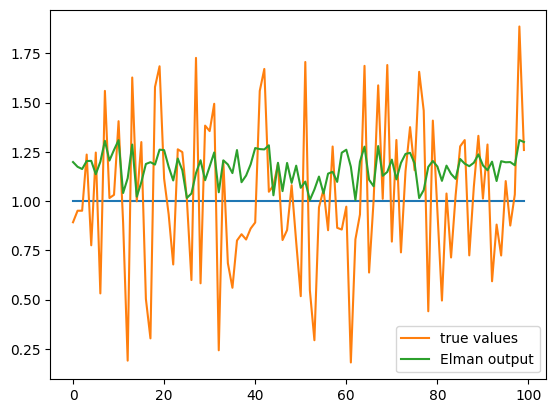

In [167]:
x = [i for i in range(100)]
y = [1 for i in range(100)]
plt.plot(x,y)
plt.plot(x,y_test,label='true values')
plt.plot(x,y_pred,label='Elman output')
plt.legend()
plt.show()